In [3]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from datetime import datetime
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression  
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, ConfusionMatrixDisplay

In [4]:
data = pd.read_csv("./dataset/1. Engineering_graduate_salary.csv")
print(data.info())
# 备份原始数据
data_backup = data.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2998 non-null   int64  
 1   Gender                 2998 non-null   object 
 2   DOB                    2998 non-null   object 
 3   10percentage           2998 non-null   float64
 4   10board                2998 non-null   object 
 5   12graduation           2998 non-null   int64  
 6   12percentage           2998 non-null   float64
 7   12board                2998 non-null   object 
 8   CollegeID              2998 non-null   int64  
 9   CollegeTier            2998 non-null   int64  
 10  Degree                 2998 non-null   object 
 11  Specialization         2998 non-null   object 
 12  collegeGPA             2998 non-null   float64
 13  CollegeCityID          2998 non-null   int64  
 14  CollegeCityTier        2998 non-null   int64  
 15  Coll

In [5]:
data.head()

,ID,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,604399,f,1990-10-22,87.80,cbse,2009,84.00,cbse,6920,1,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,988334,m,1990-05-15,57.00,cbse,2010,64.50,cbse,6624,2,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,301647,m,1989-08-21,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,9084,2,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,582313,m,1991-05-04,84.30,cbse,2009,86.00,cbse,8195,1,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,339001,f,1990-10-30,82.00,cbse,2008,75.00,cbse,4889,2,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


In [6]:
data['Gender'] = data['Gender'].map({'m': 1, 'f': 0})
# Convert BirthDate to datetime
data['DOB'] = pd.to_datetime(data['DOB'])

# Calculate age
current_year = datetime.now().year
data['Age'] = current_year - data['DOB'].dt.year

# Drop the original BirthDate column if not needed
data.drop(columns=['DOB'], inplace=True)
le = LabelEncoder()
data['10board'] = le.fit_transform(data['10board'])
data['12board'] = le.fit_transform(data['12board'])
data['Degree'] = le.fit_transform(data['Degree'])
data['Specialization'] = le.fit_transform(data['Specialization'])
data['CollegeState'] = le.fit_transform(data['CollegeState'])
data['Degree'] = le.fit_transform(data['Degree'])

### Data Cleansing

In [7]:
data.duplicated().any()

np.False_

In [8]:
data.isnull().any()

ID                       False
Gender                   False
10percentage             False
10board                  False
12graduation             False
12percentage             False
12board                  False
CollegeID                False
CollegeTier              False
Degree                   False
Specialization           False
collegeGPA               False
CollegeCityID            False
CollegeCityTier          False
CollegeState             False
GraduationYear           False
English                  False
Logical                  False
Quant                    False
Domain                   False
ComputerProgramming      False
ElectronicsAndSemicon    False
ComputerScience          False
MechanicalEngg           False
ElectricalEngg           False
TelecomEngg              False
CivilEngg                False
conscientiousness        False
agreeableness            False
extraversion             False
nueroticism              False
openess_to_experience    False
Salary  

### Linear Regression

模型的R^2为: 0.02506764045383303
模型的均方误差(MSE)为: 44317947706.476616
模型的系数为: [3040.39613913]
模型的截距为: 86345.11999416735


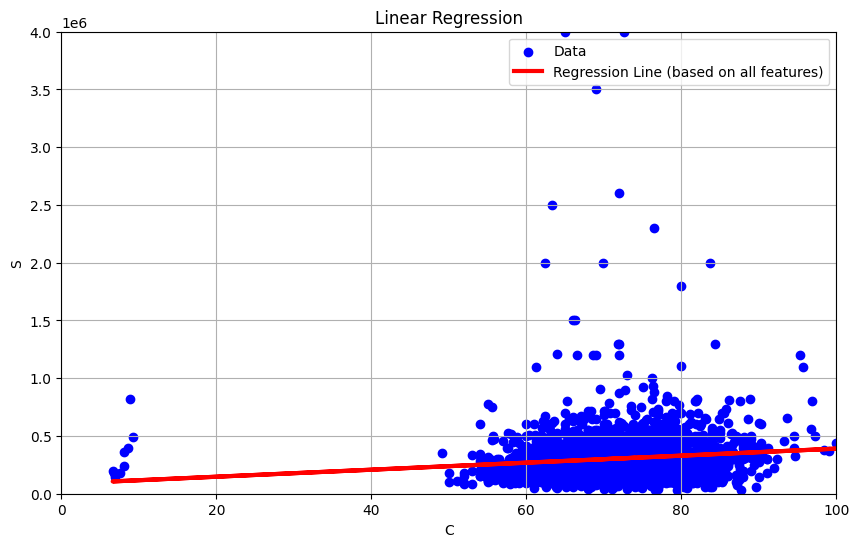

In [9]:
X = data[['collegeGPA']]
y = data['Salary']
# 分割数据为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 建立线性回归模型
model = LinearRegression()
# 训练模型
model.fit(X_train, y_train)

# 预测测试集
y_pred = model.predict(X_test)
# 评估模型
score = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"模型的R^2为: {score}")
print(f"模型的均方误差(MSE)为: {mse}")
print(f"模型的系数为: {model.coef_}")
print(f"模型的截距为: {model.intercept_}")
# 可视化：选择YearlyIncome作为X轴，并在训练集上绘制回归直线
plt.figure(figsize=(10, 6))
plt.scatter(X['collegeGPA'], y, color='blue', label='Data')

# 为了绘制回归直线，我们使用训练集中的一个子集（或全部）来预测y值
y_pred = model.predict(X)

plt.plot(X['collegeGPA'], y_pred, color='red', linewidth=3,
         label='Regression Line (based on all features)')
plt.xlim(0, 100)
plt.ylim(0, 4000000)
plt.xlabel('C')
plt.ylabel('S')
plt.title('Linear Regression')
plt.legend()
plt.grid(True)
plt.show()

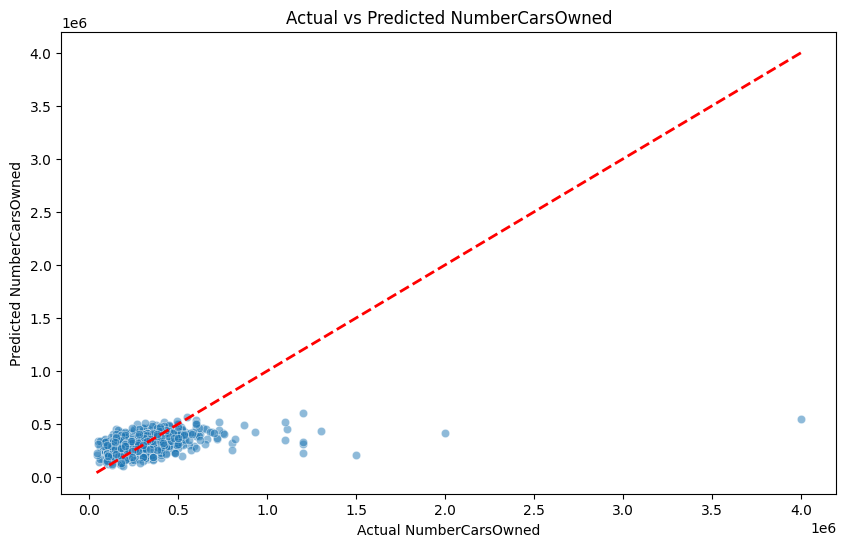

In [10]:
# 准备数据
# Prepare the data
X = data[['Age','10percentage', '10board','12graduation','12percentage', 'CollegeTier','collegeGPA','Degree','Specialization','CollegeCityTier','GraduationYear','English', 'Logical', 'Quant']]
y = data['Salary']

# 分割数据集
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 训练模型
# Train the model
car_predict = LinearRegression()
car_predict.fit(X_train, y_train)

# 进行预测
# Make predictions
predictions = car_predict.predict(X_test)
# 可视化实际值和预测值
# Visualize actual values and predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.5, edgecolors='w', linewidth=0.5)
# Plot a line for the ideal predictions (where actual equals predicted)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual NumberCarsOwned')
plt.ylabel('Predicted NumberCarsOwned')
plt.title('Actual vs Predicted NumberCarsOwned')
plt.show()

In [11]:
#整体 cluster


Group: 9


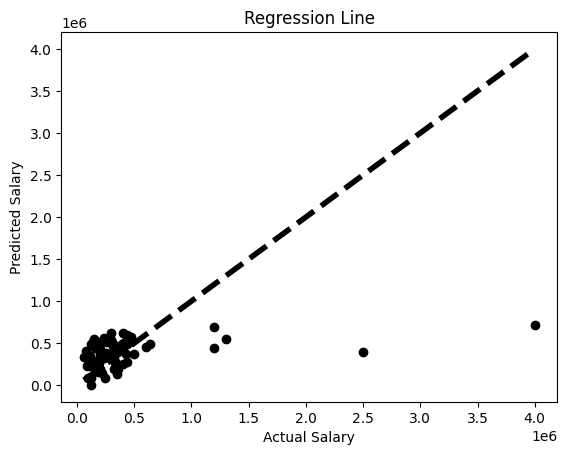

Mean Squared Error: 254012670606.51
R^2 Score: 0.14

Group: 5


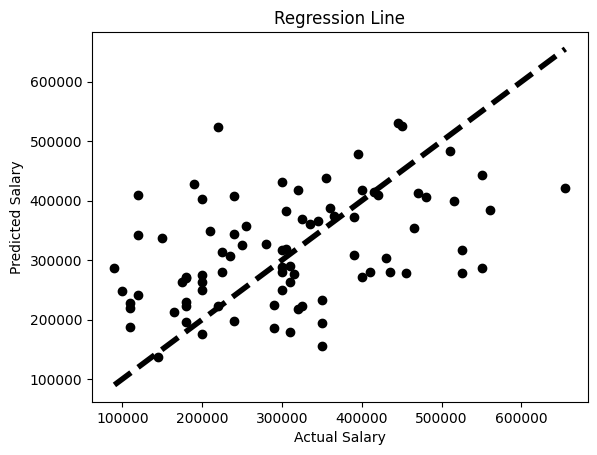

Mean Squared Error: 14527692728.76
R^2 Score: 0.11

Group: 0


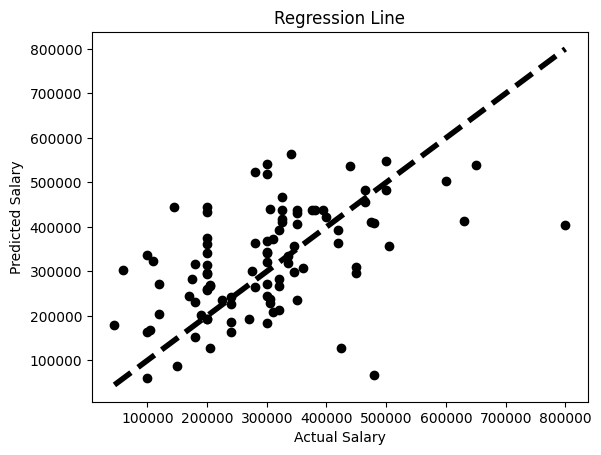

Mean Squared Error: 16604760501.73
R^2 Score: 0.06

Group: 4


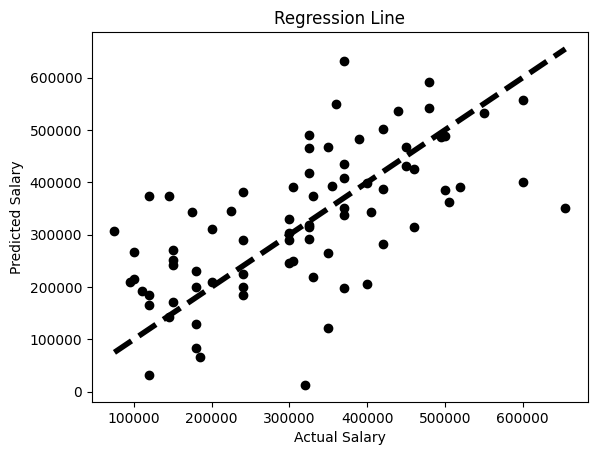

Mean Squared Error: 14061154388.09
R^2 Score: 0.26

Group: 1


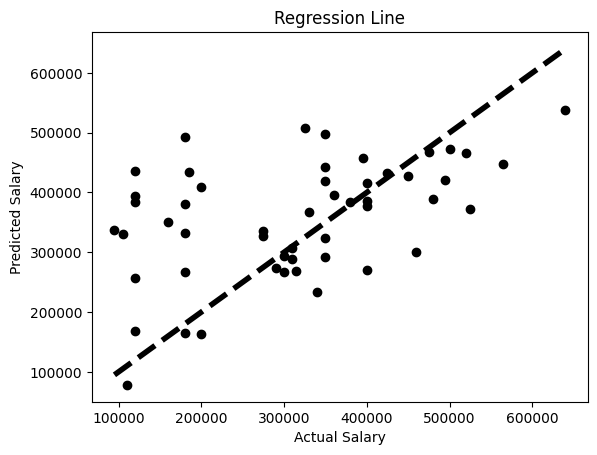

Mean Squared Error: 17642919689.67
R^2 Score: 0.06

Group: 2


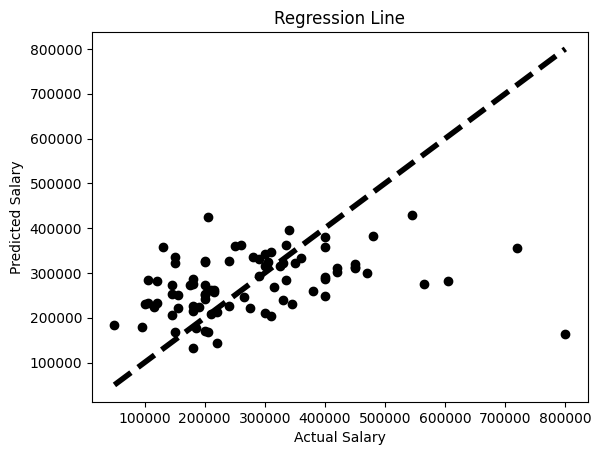

Mean Squared Error: 17449419697.46
R^2 Score: 0.10

Group: 3


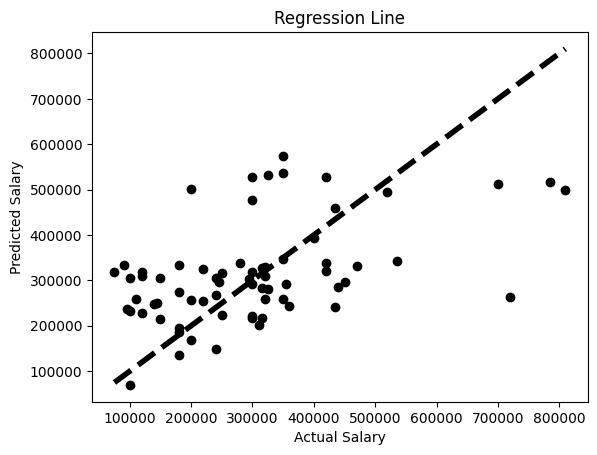

Mean Squared Error: 20401165318.48
R^2 Score: 0.20

Group: 11


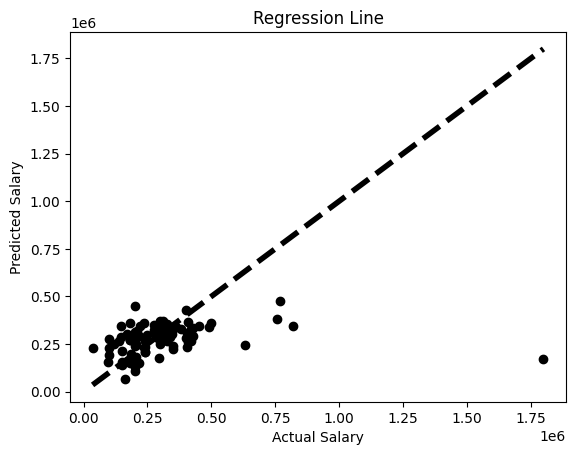

Mean Squared Error: 45678753453.32
R^2 Score: 0.01

Group: 6


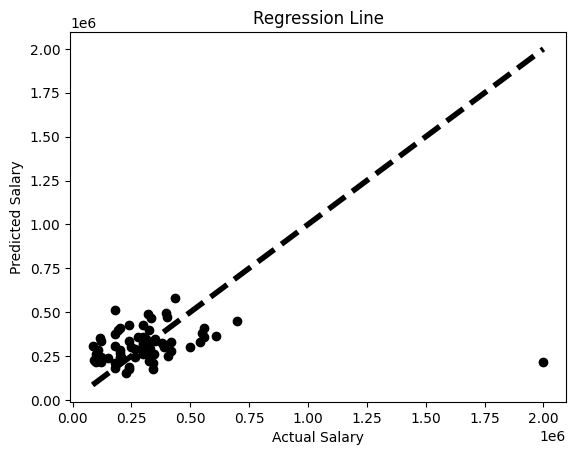

Mean Squared Error: 58174147730.09
R^2 Score: -0.06

Group: 10


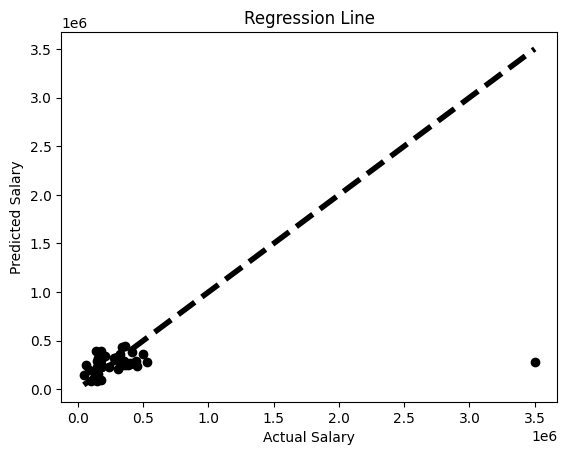

Mean Squared Error: 225770655588.70
R^2 Score: 0.00

Group: 7


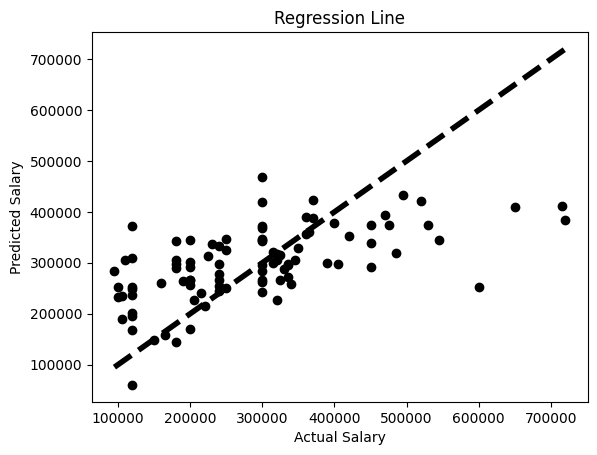

Mean Squared Error: 12376295115.34
R^2 Score: 0.35

Group: 8


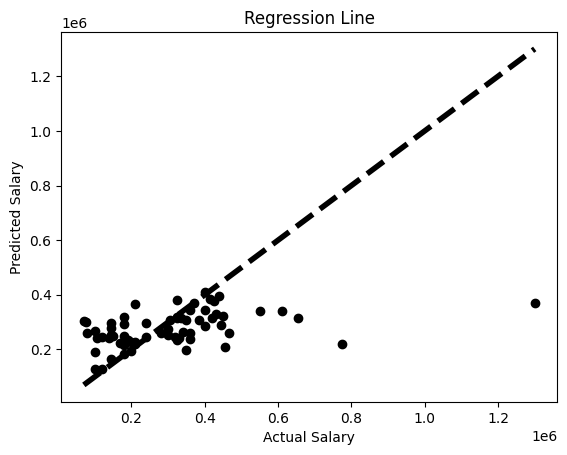

Mean Squared Error: 31247912322.03
R^2 Score: 0.16


In [12]:

target = 'Salary'

features = ['10board','12board','CollegeID','CollegeTier','Degree','Specialization','CollegeCityID','CollegeCityTier','CollegeState']
# 数据标准化
scaler = StandardScaler()
data[features] = scaler.fit_transform(data[features])
# Perform KMeans clustering
kmeans = KMeans(n_clusters=20, random_state=42)
data['cluster1'] = kmeans.fit_predict(data[features])

features = ['Age','12graduation','GraduationYear']
# 数据标准化
scaler = StandardScaler()
data[features] = scaler.fit_transform(data[features])
# Perform KMeans clustering
kmeans = KMeans(n_clusters=20, random_state=42)
data['cluster2'] = kmeans.fit_predict(data[features])

features = ['collegeGPA','10percentage','12percentage']
# 数据标准化
scaler = StandardScaler()
data[features] = scaler.fit_transform(data[features])
# Perform KMeans clustering
kmeans = KMeans(n_clusters=20, random_state=42)
data['cluster3'] = kmeans.fit_predict(data[features])

features = ['English','Logical','Quant']
# 数据标准化
scaler = StandardScaler()
data[features] = scaler.fit_transform(data[features])
# Perform KMeans clustering
kmeans = KMeans(n_clusters=20, random_state=42)
data['cluster4'] = kmeans.fit_predict(data[features])

features = ['cluster1','cluster2','cluster3','cluster4']
# 数据标准化
scaler = StandardScaler()
data[features] = scaler.fit_transform(data[features])
# Perform KMeans clustering
kmeans = KMeans(n_clusters=12, random_state=42)
data['cluster'] = kmeans.fit_predict(data[features])


groups = data['cluster'].unique()[:12]  # 选择前5个类别进行分组
features = ['Age','10percentage', '10board','12graduation','12percentage', 'CollegeTier','collegeGPA','Degree','Specialization','CollegeCityTier','GraduationYear','English', 'Logical', 'Quant']
# 定义函数进行线性回归并预测薪资
def linear_regression_prediction(data, features, target):
    X = data[features]
    y = data[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    # 绘制拟合曲线
    plt.scatter(y_test, predictions, color='black')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=4)
    plt.xlabel('Actual ' + target)
    plt.ylabel('Predicted ' + target)
    plt.title('Regression Line')
    plt.show()
    
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f'Mean Squared Error: {mse:.2f}')
    print(f'R^2 Score: {r2:.2f}')
    return model

# 对每个分类组进行线性回归预测
models = {}
for group in groups:
    print(f"\nGroup: {group}")
    group_data = data[data['cluster'] == group]
    model = linear_regression_prediction(group_data, features, target)
    models[group] = model



原始特征数量: 22，降维后的特征数量: 11


KMeans Silhouette Score: 0.16336179391494707


/var/folders/2d/fxsd9j2x5c1_4_6qtgkldkmm0000gn/T/ipykernel_96524/4158455385.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[f'Salary_weighted_{i}'] = data['Salary']
/var/folders/2d/fxsd9j2x5c1_4_6qtgkldkmm0000gn/T/ipykernel_96524/4158455385.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[f'Salary_weighted_{i}'] = data['Salary']
/var/folders/2d/fxsd9j2x5c1_4_6qtgkldkmm0000gn/T/ipykernel_96524/4158455385.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

Hierarchical Clustering Silhouette Score: 0.17955788505914022


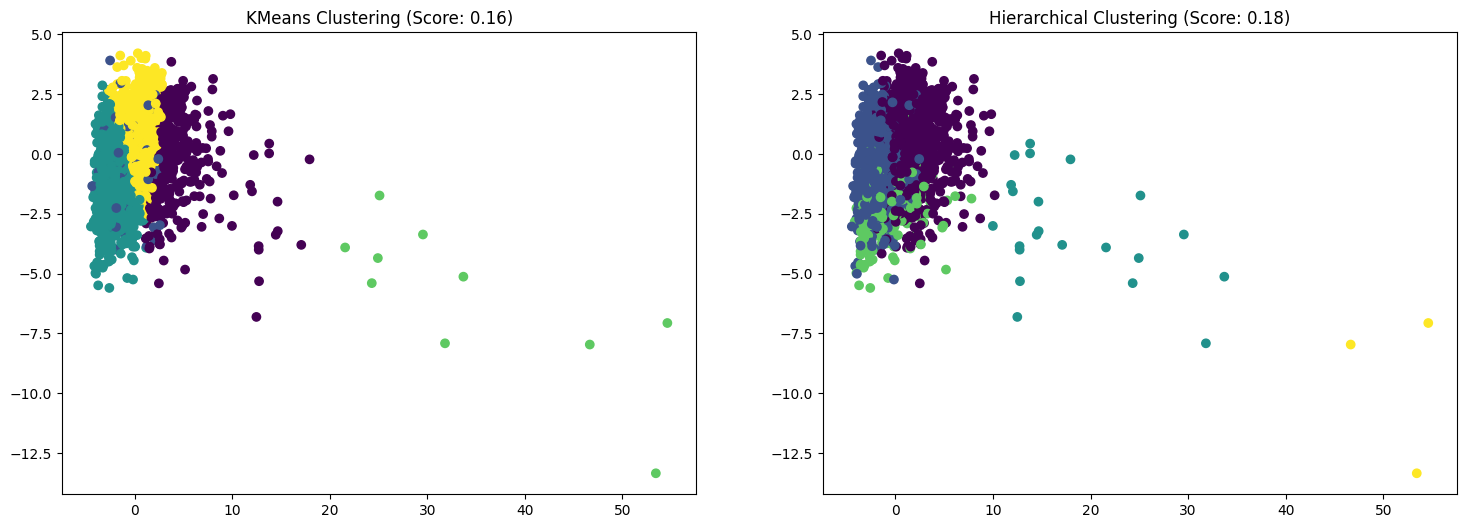

Cross-Validated R2 Scores: [0.70895779 0.8022266  0.71360302 0.80208462 0.65131009]
Mean R2 Score: 0.7356364250183105


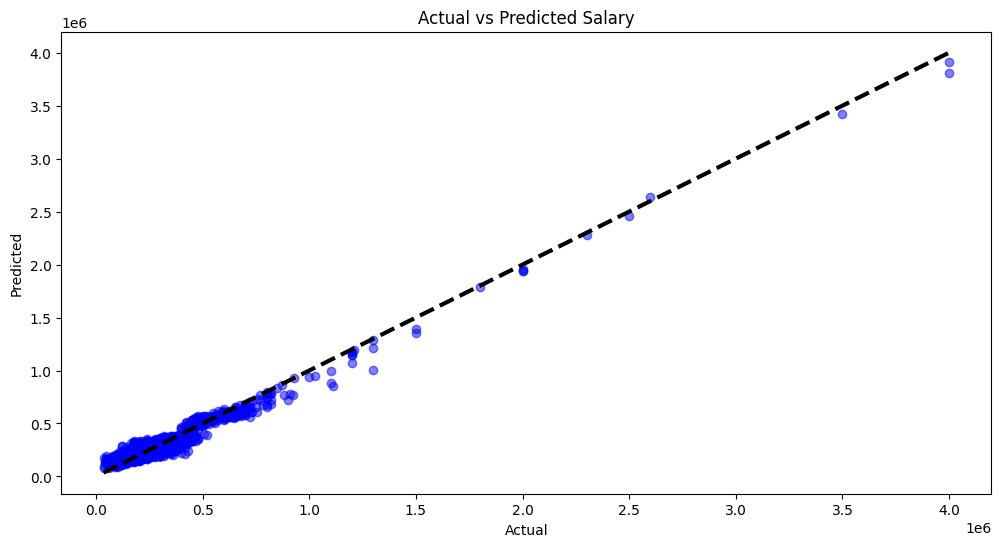

In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.model_selection import train_test_split, cross_val_score, KFold
import matplotlib.pyplot as plt
import xgboost as xgb
import numpy as np

# 选择用于分组的特征
features = ['10percentage', '12percentage', 'Age', 'Quant', 'Domain', 'Logical', 'ComputerProgramming', 'English', 'collegeGPA', 'Degree', 'Specialization', 'CollegeState', 'Salary']
X = data[features]

# 增加 Salary 的权重
salary_weight = 10
for i in range(salary_weight - 1):
    X[f'Salary_weighted_{i}'] = data['Salary']

# 标准化特征
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 使用 PCA 降维
pca = PCA(n_components=0.95)  # 保留95%的方差
X_pca = pca.fit_transform(X_scaled)
print(f'原始特征数量: {X_scaled.shape[1]}，降维后的特征数量: {X_pca.shape[1]}')

# 使用 KMeans 进行分组，设定聚类数量为5
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(X_pca)
kmeans_score = silhouette_score(X_pca, kmeans_labels)
print(f'KMeans Silhouette Score: {kmeans_score}')

# 使用层次聚类进行分组，设定聚类数量为5
hierarchical = AgglomerativeClustering(n_clusters=5)
hierarchical_labels = hierarchical.fit_predict(X_pca)
hierarchical_score = silhouette_score(X_pca, hierarchical_labels)
print(f'Hierarchical Clustering Silhouette Score: {hierarchical_score}')

# 结果展示
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis')
plt.title(f'KMeans Clustering (Score: {kmeans_score:.2f})')

plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=hierarchical_labels, cmap='viridis')
plt.title(f'Hierarchical Clustering (Score: {hierarchical_score:.2f})')

plt.show()

# 使用KMeans分组标签作为特征进行薪资预测
data['Cluster'] = kmeans_labels
features_for_prediction = ['Cluster', '10percentage', '12percentage', 'Age', 'Quant', 'Domain', 'Logical', 'ComputerProgramming', 'English', 'collegeGPA', 'Degree', 'Specialization', 'CollegeState']
X_pred = data[features_for_prediction]
y_pred = data['Salary']

# 交叉验证
kf = KFold(n_splits=5, shuffle=True, random_state=42)
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, random_state=42)
cv_scores = cross_val_score(model, X_pred, y_pred, cv=kf, scoring='r2')
print(f'Cross-Validated R2 Scores: {cv_scores}')
print(f'Mean R2 Score: {np.mean(cv_scores)}')

# 使用整个数据集训练模型
model.fit(X_pred, y_pred)

# 预测结果可视化
y_pred_all = model.predict(X_pred)

plt.figure(figsize=(12, 6))
plt.scatter(y_pred, y_pred_all, color='blue', alpha=0.5)
plt.plot([y_pred.min(), y_pred.max()], [y_pred.min(), y_pred.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Salary')
plt.show()

/var/folders/2d/fxsd9j2x5c1_4_6qtgkldkmm0000gn/T/ipykernel_96524/3554639601.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[f'Salary_weighted_{i}'] = data['Salary']
/var/folders/2d/fxsd9j2x5c1_4_6qtgkldkmm0000gn/T/ipykernel_96524/3554639601.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[f'Salary_weighted_{i}'] = data['Salary']
/var/folders/2d/fxsd9j2x5c1_4_6qtgkldkmm0000gn/T/ipykernel_96524/3554639601.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

原始特征数量: 22，降维后的特征数量: 11
KMeans Silhouette Score: 0.16336179391494707
Hierarchical Clustering Silhouette Score: 0.17955788505914022


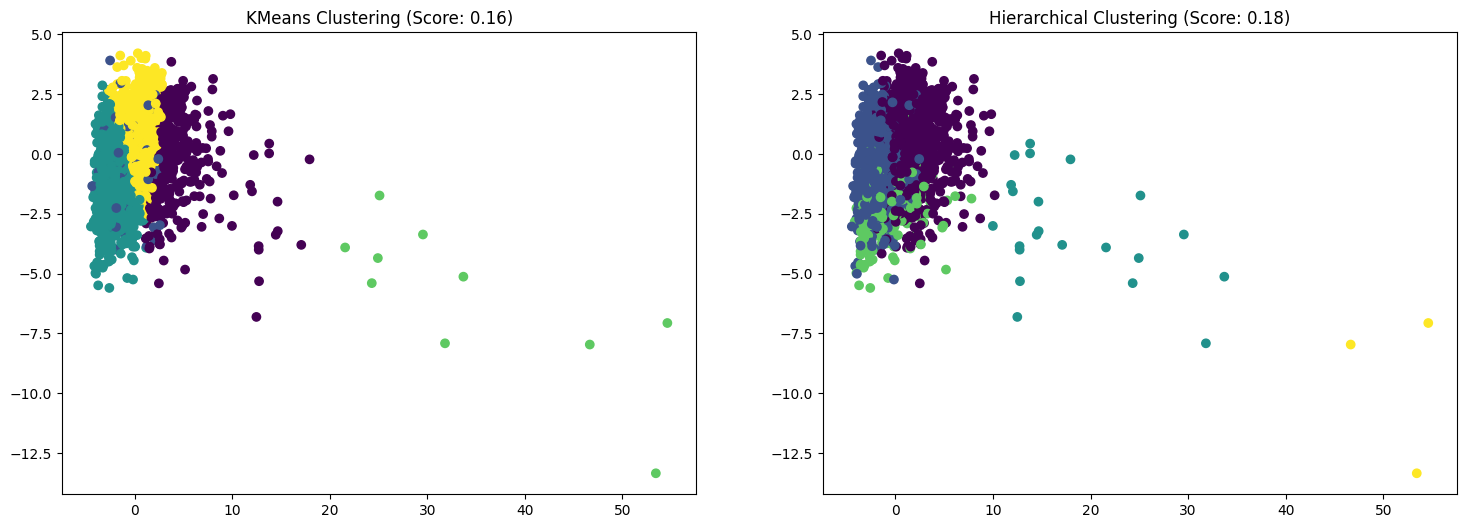

Training Score: 0.9579284191131592
Test Score: 0.7089577913284302


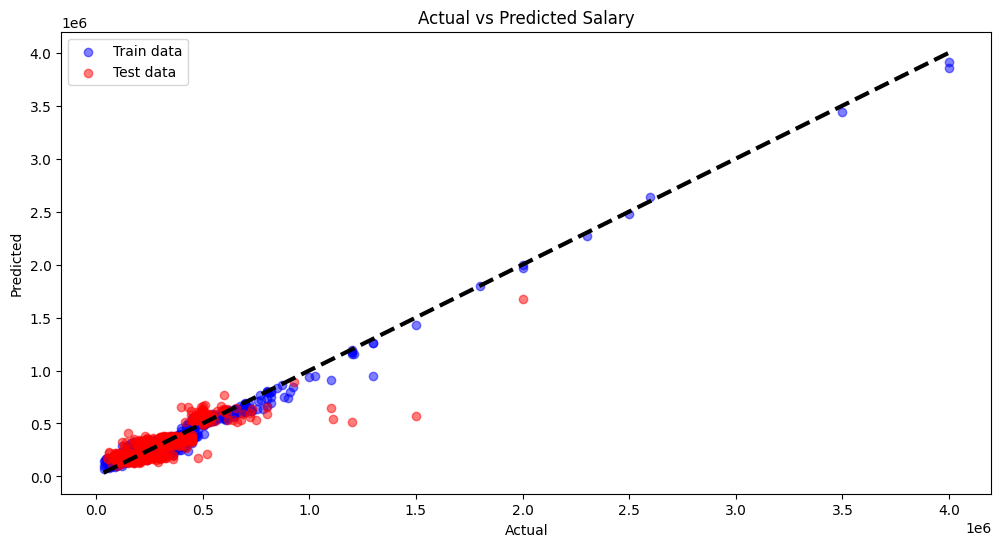

In [14]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
import xgboost as xgb
# 选择用于分组的特征
features = ['10percentage', '12percentage', 'Age', 'Quant', 'Domain', 'Logical', 'ComputerProgramming', 'English', 'collegeGPA', 'Degree', 'Specialization', 'CollegeState', 'Salary']
X = data[features]

# 增加 Salary 的权重
salary_weight = 10
for i in range(salary_weight - 1):
    X[f'Salary_weighted_{i}'] = data['Salary']

# 标准化特征
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 使用 PCA 降维
pca = PCA(n_components=0.95)  # 保留95%的方差
X_pca = pca.fit_transform(X_scaled)
print(f'原始特征数量: {X_scaled.shape[1]}，降维后的特征数量: {X_pca.shape[1]}')

# 使用 KMeans 进行分组，设定聚类数量为5
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(X_pca)
kmeans_score = silhouette_score(X_pca, kmeans_labels)
print(f'KMeans Silhouette Score: {kmeans_score}')

# 使用层次聚类进行分组，设定聚类数量为5
hierarchical = AgglomerativeClustering(n_clusters=5)
hierarchical_labels = hierarchical.fit_predict(X_pca)
hierarchical_score = silhouette_score(X_pca, hierarchical_labels)
print(f'Hierarchical Clustering Silhouette Score: {hierarchical_score}')

# 结果展示
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis')
plt.title(f'KMeans Clustering (Score: {kmeans_score:.2f})')

plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=hierarchical_labels, cmap='viridis')
plt.title(f'Hierarchical Clustering (Score: {hierarchical_score:.2f})')

plt.show()

# 使用KMeans分组标签作为特征进行薪资预测
data['Cluster'] = kmeans_labels
features_for_prediction = ['Cluster', '10percentage', '12percentage', 'Age', 'Quant', 'Domain', 'Logical', 'ComputerProgramming', 'English', 'collegeGPA', 'Degree', 'Specialization', 'CollegeState']
X_pred = data[features_for_prediction]
y_pred = data['Salary']

# 分割数据集
X_train, X_test, y_train, y_test = train_test_split(X_pred, y_pred, test_size=0.2, random_state=42)

# 训练XGBoost模型
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# 评估模型
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print(f'Training Score: {train_score}')
print(f'Test Score: {test_score}')

# 预测
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# 可视化结果
plt.figure(figsize=(12, 6))
plt.scatter(y_train, y_pred_train, color='blue', alpha=0.5, label='Train data')
plt.scatter(y_test, y_pred_test, color='red', alpha=0.5, label='Test data')
plt.plot([y_pred.min(), y_pred.max()], [y_pred.min(), y_pred.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.title('Actual vs Predicted Salary')
plt.show()

Best KMeans Silhouette Score: 0.16959321375835598 with 3 clusters
Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; 

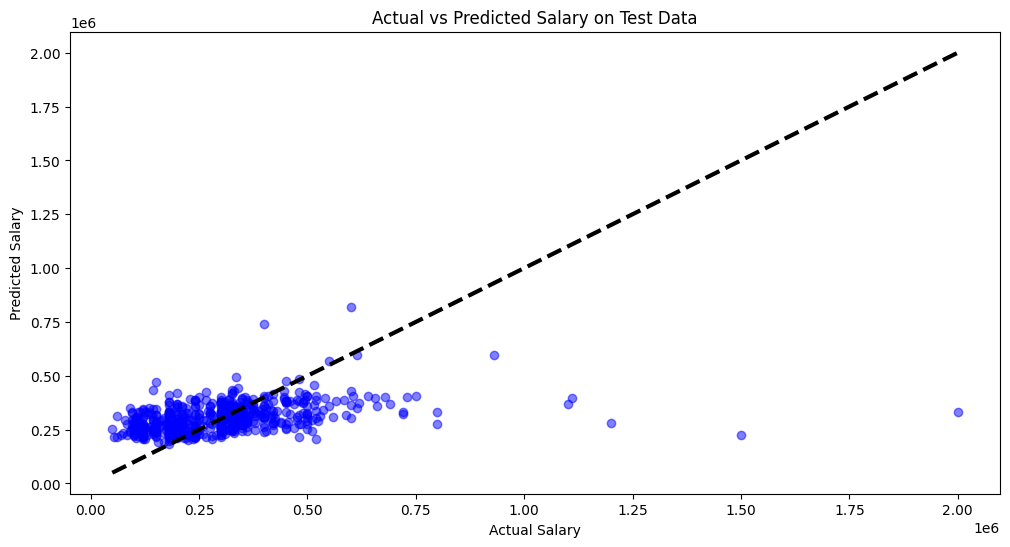

In [21]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
import xgboost as xgb
import matplotlib.pyplot as plt
import numpy as np


# 选择用于分组的特征，不包括 Salary
features = ['10percentage', '12percentage', 'Age', 'Quant', 'Domain', 'Logical', 'ComputerProgramming', 'English', 'collegeGPA', 'Degree', 'Specialization', 'CollegeState']
X = data[features]
y = data['Salary']

# 分割数据集，注意分割时不包含 Salary 列
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 增加训练集 Salary 的权重
salary_weight = 5
for i in range(salary_weight - 1):
    X_train[f'Salary_weighted_{i}'] = y_train.values

# 标准化特征
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.drop(columns=[f'Salary_weighted_{i}' for i in range(salary_weight - 1)]))
X_test_scaled = scaler.transform(X_test)

# 使用 PCA 降维
pca = PCA(n_components=0.95)  # 保留95%的方差
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# 尝试不同的聚类数量
best_score = -1
best_k = 0
for k in range(2, 11):  # 尝试 2 到 10 个聚类
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans_labels_train = kmeans.fit_predict(X_train_pca)
    score = silhouette_score(X_train_pca, kmeans_labels_train)
    if score > best_score:
        best_score = score
        best_k = k

print(f'Best KMeans Silhouette Score: {best_score} with {best_k} clusters')

# 使用最佳的聚类数量进行分组
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans_labels_train = kmeans.fit_predict(X_train_pca)
kmeans_labels_test = kmeans.predict(X_test_pca)

# 添加聚类标签到数据中
X_train['Cluster'] = kmeans_labels_train
X_test['Cluster'] = kmeans_labels_test

# 准备用于预测的特征
features_for_prediction = ['Cluster'] + features
X_train_pred = X_train[features_for_prediction]
X_test_pred = X_test[features_for_prediction]

# 调整XGBoost模型参数
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)
grid_search.fit(X_train_pred, y_train)

best_model = grid_search.best_estimator_
print(f'Best Parameters: {grid_search.best_params_}')

# 使用最佳模型进行预测
y_pred_train = best_model.predict(X_train_pred)
y_pred_test = best_model.predict(X_test_pred)

# 评估模型
train_score = r2_score(y_train, y_pred_train)
test_score = r2_score(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
print(f'Training R2 Score: {train_score}')
print(f'Test R2 Score: {test_score}')
print(f'Test MSE: {mse}')

# 可视化结果
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_test, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salary on Test Data')
plt.show()
